In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1) Import required libraries**

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import tensorflow as tf

import seaborn as sn


import math
import datetime
import platform


from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import batch_normalization

print("Loaded required libraries...")

Loaded required libraries...


In [3]:
tf.__version__

'2.6.0'

**2) Data loading and exploration**

In [4]:
fpath = "/content/drive/MyDrive/image"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

noc= len(categories)

List of categories =  ['Apple', 'Banana', 'Carambola', 'Guava', 'Mango', 'Orange', 'Peach', 'Pomegranate', 'Pitaya', 'Tomato'] 

No. of categories =  10


In [ ]:
print (categories)

labels = '\n'.join(sorted(categories.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:150]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg") or (file_ext.lower() == "png"):
                print(f"\nCategory = {category}, Image name = {image_name}") 
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

In [6]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [7]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1500, 227, 227, 3) 
Labels shape =  (1500,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Training data shape :  (1500, 227, 227, 3) (1500,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Leaf : 0')

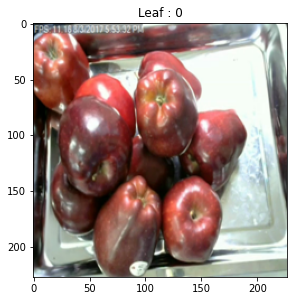

In [8]:
print('Training data shape : ', images.shape,labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(images[22,:,:], cmap='gray')
plt.title("Leaf : {}".format(labels[22]))



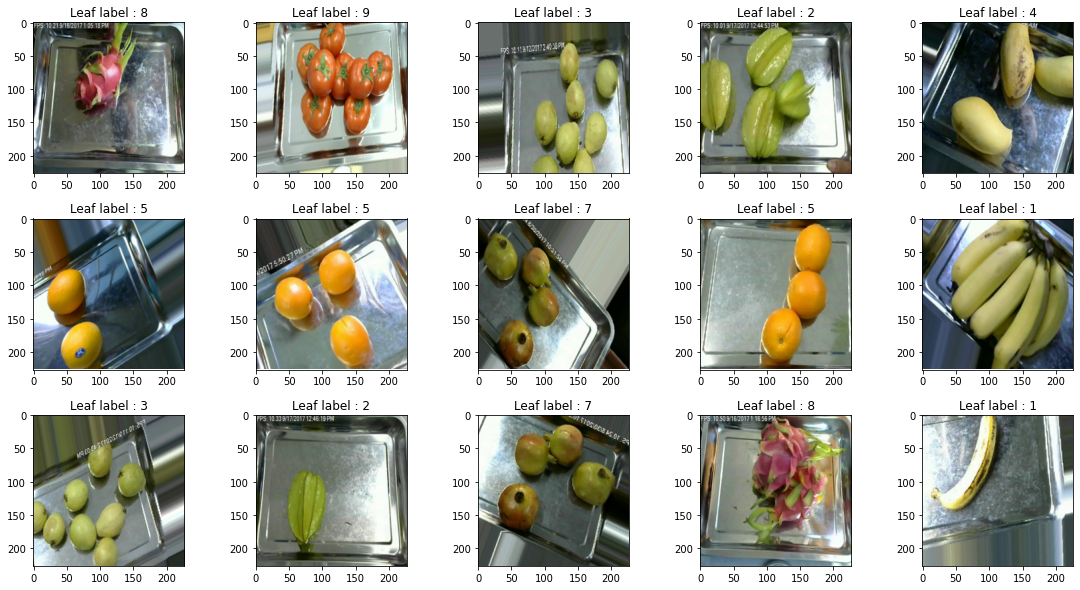

In [16]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(15):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 5 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        #plt.figure(figsize=[10,5])

        plt.title('Leaf label : {}'.format(labels[r[0]]))
#        plt.xticks([])
#       plt.yticks([])
      
    plt.show()
    
display_rand_images(images, labels)

**3) Prepare data for CNN model training**

Step 1 - shuffle the data loaded from the dataset

In [17]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
#print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
#print("\n'n' values after shuffling = ",n)

In [18]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (1500, 227, 227, 3) 
Labels shape after shuffling =  (1500,)


Step 2 - Data normalization

In [19]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (1500, 227, 227, 3)


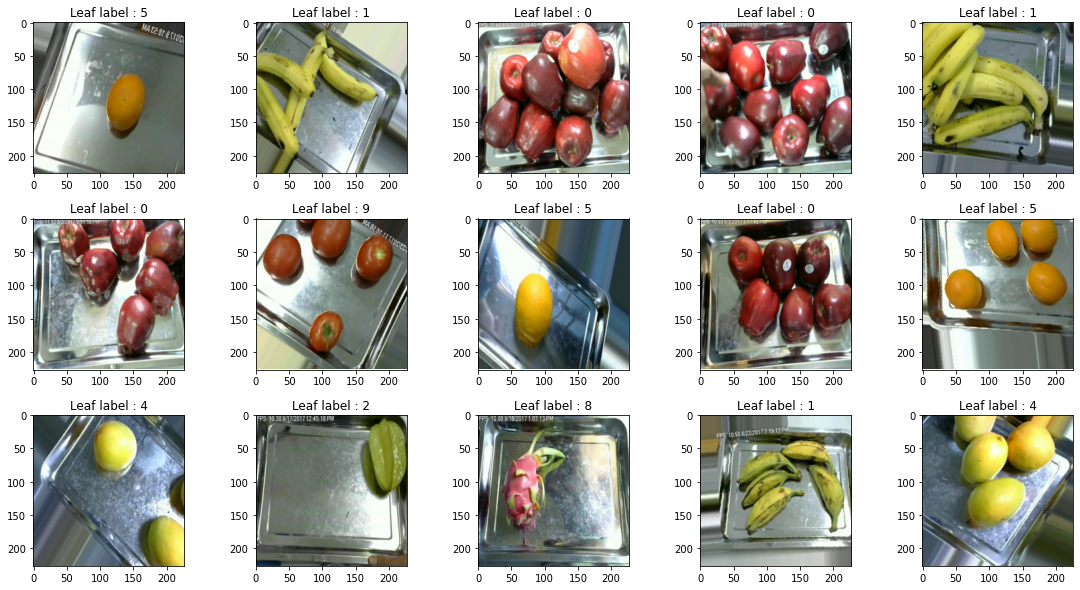

In [20]:
display_rand_images(images, labels)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (1200, 227, 227, 3)
y_train shape =  (1200,)

x_test shape =  (300, 227, 227, 3)
y_test shape =  (300,)


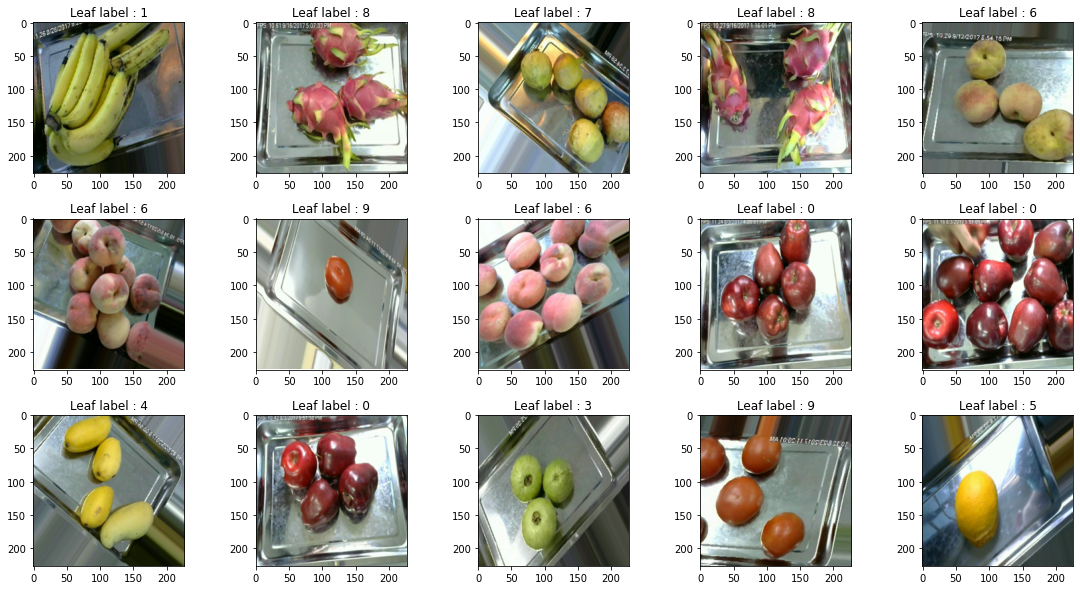

In [22]:
display_rand_images(x_train, y_train)

**4) Define CNN model (AlexNet)**

In [65]:
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant

In [67]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 9, 9, 384)       

In [68]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [69]:
hist= model.fit(x_train, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 102s 3s/step - loss: 1.9438 - accuracy: 0.4250
Epoch 2/10
38/38 [==============================] - 101s 3s/step - loss: 1.1323 - accuracy: 0.6292
Epoch 3/10
38/38 [==============================] - 100s 3s/step - loss: 0.9148 - accuracy: 0.6942
Epoch 4/10
38/38 [==============================] - 100s 3s/step - loss: 0.8807 - accuracy: 0.6983
Epoch 5/10
38/38 [==============================] - 100s 3s/step - loss: 0.7650 - accuracy: 0.7425
Epoch 6/10
38/38 [==============================] - 101s 3s/step - loss: 0.6209 - accuracy: 0.8000
Epoch 7/10
38/38 [==============================] - 101s 3s/step - loss: 0.6182 - accuracy: 0.7967
Epoch 8/10
38/38 [==============================] - 100s 3s/step - loss: 0.4879 - accuracy: 0.8292
Epoch 9/10
38/38 [==============================] - 101s 3s/step - loss: 0.5615 - accuracy: 0.8075
Epoch 10/10
38/38 [==============================] - 102s 3s/step - loss: 0.5088 - accuracy: 0.8192


In [70]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

10/10 [==============================] - 7s 635ms/step - loss: 1.1996 - accuracy: 0.7033
1.1996140480041504 0.70333331823349


In [76]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_test, y_test),
)

Fit model on training data
Epoch 1/2
19/19 [==============================] - 103s 5s/step - loss: 0.2979 - accuracy: 0.9008 - val_loss: 0.3761 - val_accuracy: 0.8800
Epoch 2/2
19/19 [==============================] - 102s 5s/step - loss: 0.1924 - accuracy: 0.9317 - val_loss: 0.5548 - val_accuracy: 0.8100


Display few random images with actual vs predicted values of labels

In [77]:
pred = model.predict(x_test)

pred.shape

(300, 10)

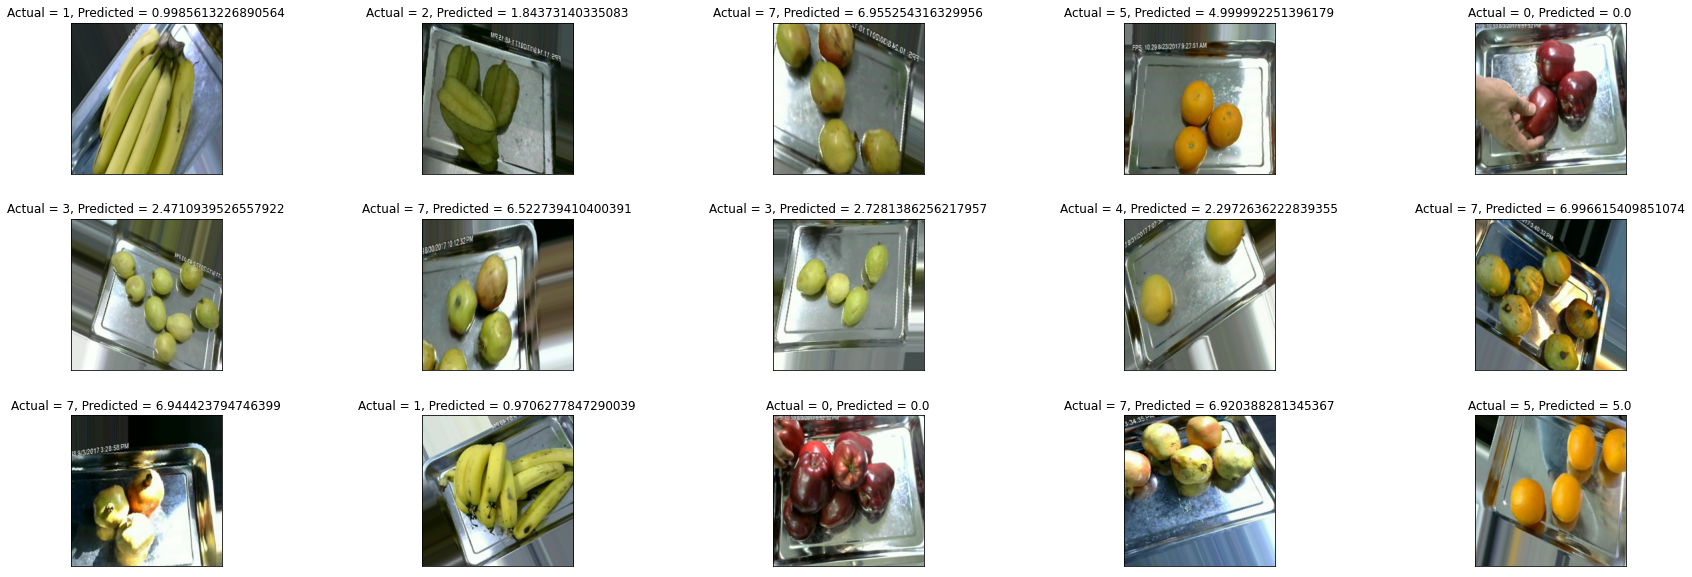

In [78]:
plt.figure(1 , figsize = (30 , 10))
n = 0 

for i in range(15):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 5, n)
    plt.subplots_adjust(hspace = .3, wspace = .3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

**Accuracy Graph**

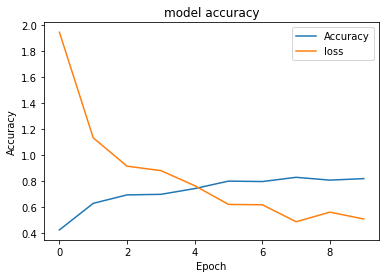

In [73]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])

plt.plot(hist.history['loss'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

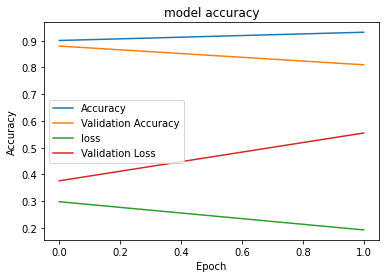

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

**7) Save trained model, weights**

In [75]:
# save model in JSON format
model_json = model.to_json()
json_file = open("/content/drive/MyDrive/Colab Notebooks/model1.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights("/content/model1.h5")
print("\nModel weights saved!")

Model saved in JSON format!

Model weights saved!


**Convert To tflite**

In [ ]:
import tensorflow as tf

#model = tf.keras.models.load_model('/content/model1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model1.tflite", "wb").write(tflite_model)

**Convert To tflite**

In [ ]:
# save model in tflite
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files
files.download('model.tflite')